# ch 3. ARIMA

이번 챕터에서는 본격적으로 시계열 예측 모델들에 대해서 배웁니다. 그 중에서도 ARIMA는 가장 기본적인 시계열 예측 모델입니다.

## 데이터 셋 준비

과적합 여부 파악과 성능 평가를 위해 특정 시점을 기준으로 train과 test 셋을 나누겠습니다.

In [1]:
import pandas as pd

train_df = pd.read_csv("./data/passengers_train.csv", index_col="Month", parse_dates=True)
test_df = pd.read_csv("./data/passengers_test.csv", index_col="Month", parse_dates=True)

<Axes: xlabel='Month'>

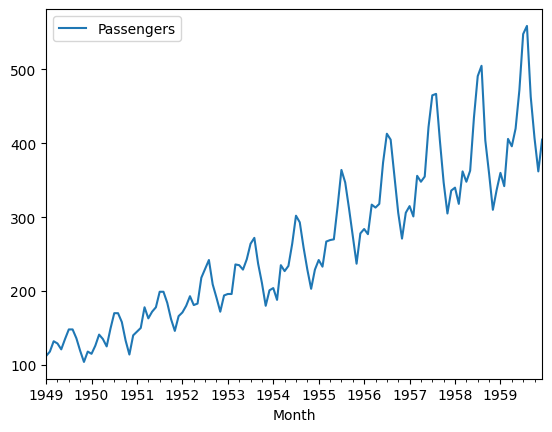

In [2]:
train_df.plot()

<Axes: xlabel='Month'>

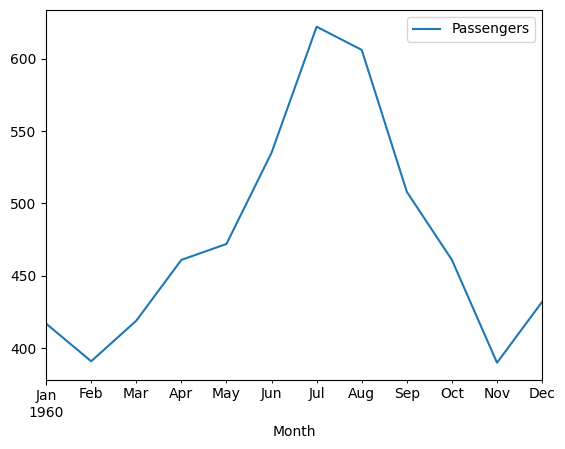

In [3]:
test_df.plot()

## ARIMA

ARIMA 모델은 가장 기본적인 시계열 예측 모델이며 크게 세가지 구성 요소로 이루어져 있습니다. 

- AR(Auto Regression): 현재 관측값과 이전 기간의 관측값 사이의 종속 관계를 활용하는 회귀 모델입니다.
- I(Integration):  시계열을 고정시키기 위해 관측치 차분을 사용합니다. 미분은 시계열의 현재 값에서 이전 값 d 횟수를 빼는 것을 포함합니다.
- MA(Moving Average): 잔차 오차와 관측치 간의 종속성을 사용하는 모델입니다. 이동 평균 성분은 모델의 오차를 이전 오차 항의 조합으로 나타냅니다.

ARIMA 모델을 학습시키기 위해서는 p, d, q 세가지 파라미터를 결정해야 하며, 이를 위해선 각 구성 요소들이 어떻게 동작하는지 이해해야 합니다.

### Auto Regressive

이전 시점의 값들을 feature로 사용하여 다음에 올 값을 예측하는 회귀 모델입니다. 스스로를 feature로 사용하기 때문에 auto regressive 모델이라고 부릅니다. 

$$Y_{t}=\alpha+\beta_{1}Y_{t-1}+\beta_{t-2}+...+\beta_{p}Y_{t-p}+\epsilon_{t}$$

여기서 몇번째 lag 까지를 회귀식에 포함할 지를 의미하는 p가 ARIMA 모델을 학습시키기 위해 필요한 첫번째 파라미터입니다.

간단하게 AR 모델을 학습시켜보고, 시각화해보겠습니다.

In [4]:
from statsmodels.tsa.ar_model import AutoReg

ar_4_model = AutoReg(train_df["Passengers"], lags=4).fit()
ar_12_model = AutoReg(train_df["Passengers"], lags=12).fit()

/Users/user/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/user/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


예측 결과가 얼마나 정확한지 오차를 측정해보겠습니다.

In [5]:
ar_4_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  132
Model:                     AutoReg(4)   Log Likelihood                -611.397
Method:               Conditional MLE   S.D. of innovations             28.720
Date:                Fri, 12 Jan 2024   AIC                           1234.794
Time:                        10:28:30   BIC                           1251.906
Sample:                    05-01-1949   HQIC                          1241.747
                         - 12-01-1959                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.3932      7.122      1.740      0.082      -1.567      26.353
Passengers.L1     1.2968      0.088     14.694      0.000       1.124       1.470
Passengers.L2    -0.4727      0.146     -3.228      0.001      -0.760      -0.186
Passengers.L3    -0.0314      0.147     -0.213      0.831      -0.319       0.257
Passengers.L4     0.1692      0.090      1.881      0.060      -0.007       0.345
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0399           -0.0000j            1.0399           -0.0000
AR.2            0.8292           -1.2548j            1.5040           -0.1571
AR.3            0.8292           +1.2548j            1.5040            0.1571
AR.4           -2.5128           -0.0000j            2.5128           -0.5000
-----------------------------------------------------------------------------
"""

In [6]:
ar_12_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  132
Model:                    AutoReg(12)   Log Likelihood                -477.032
Method:               Conditional MLE   S.D. of innovations             12.888
Date:                Fri, 12 Jan 2024   AIC                            982.064
Time:                        10:28:47   BIC                           1021.089
Sample:                    01-01-1950   HQIC                           997.912
                         - 12-01-1959                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             10.1990      3.668      2.780      0.005       3.009      17.389
Passengers.L1      0.5390      0.082      6.543      0.000       0.378       0.701
Passengers.L2     -0.3436      0.089     -3.844      0.000      -0.519      -0.168
Passengers.L3      0.2570      0.090      2.843      0.004       0.080       0.434
Passengers.L4     -0.2716      0.089     -3.066      0.002      -0.445      -0.098
Passengers.L5      0.3283      0.087      3.757      0.000       0.157       0.500
Passengers.L6     -0.3451      0.090     -3.847      0.000      -0.521      -0.169
Passengers.L7      0.3208      0.093      3.459      0.001       0.139       0.503
Passengers.L8     -0.3658      0.092     -3.975      0.000      -0.546      -0.185
Passengers.L9      0.3622      0.093      3.889      0.000       0.180       0.545
Passengers.L10    -0.3759      0.096     -3.898      0.000      -0.565      -0.187
Passengers.L11     0.4433      0.099      4.476      0.000       0.249       0.637
Passengers.L12     0.4937      0.092      5.349      0.000       0.313       0.675
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.9950           -0.0000j            0.9950           -0.0000
AR.2             0.8619           -0.4889j            0.9909           -0.0821
AR.3             0.8619           +0.4889j            0.9909            0.0821
AR.4             0.5018           -0.8628j            0.9981           -0.1662
AR.5             0.5018           +0.8628j            0.9981            0.1662
AR.6             0.0173           -1.0159j            1.0160           -0.2473
AR.7             0.0173           +1.0159j            1.0160            0.2473
AR.8            -0.5235           -0.8948j            1.0367           -0.3343
AR.9            -0.5235           +0.8948j            1.0367            0.3343
AR.10           -0.9001           -0.4768j            1.0186           -0.4225
AR.11           -0.9001           +0.4768j            1.0186            0.4225
AR.12           -1.8077           -0.0000j            1.8077           -0.5000
------------------------------------------------------------------------------
"""

In [8]:
train_df["ar 4"] = ar_4_model.predict()
train_df["ar 12"] = ar_12_model.predict()

<Axes: xlabel='Month'>

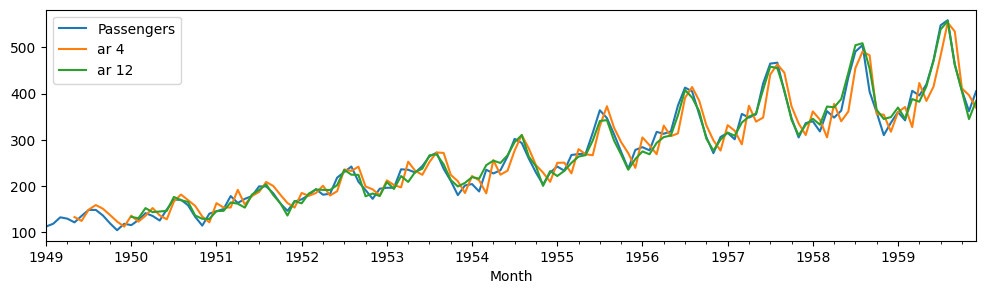

In [10]:
train_df.plot(figsize=(12, 3))

In [11]:
test_df["ar 4"] = ar_4_model.forecast(steps=len(test_df))
test_df["ar 12"] = ar_12_model.forecast(steps=len(test_df))

/Users/user/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/Users/user/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


<Axes: xlabel='Month'>

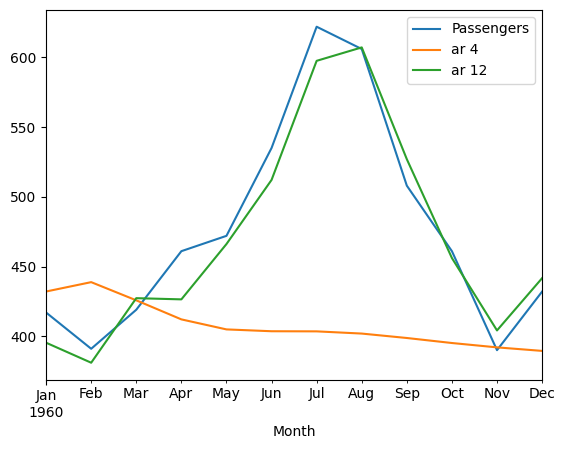

In [13]:
test_df.plot()

In [16]:
from sklearn.metrics import mean_squared_error
import numpy as np

def calculate_rmse(df, label_column, pred_column):
    rmse = np.sqrt(mean_squared_error(df[label_column], df[pred_column]))
    print(f"{pred_column}: {rmse}")

In [17]:
calculate_rmse(test_df, "Passengers", "ar 4")
calculate_rmse(test_df, "Passengers", "ar 12")

ar 4: 105.76024083588153
ar 12: 17.48752763093436


### Moving Average

ARIMA 모델에서 등장하는 moving average는 이전에 직접 구해보았던 이동 평균과는 다른 개념입니다. 이는 auto regressive 모델의 예측값과 실제 값 사이의 오차를 feature로 사용하는 회귀 모델입니다. 앞서 학습시킨 auto regressive의 예측값과 실제 값 사이에 오차항을 확인해보겠습니다.

In [18]:
train_df["ar 4 err"] = train_df["Passengers"] - train_df["ar 4"]
train_df["ar 12 err"] = train_df["Passengers"] - train_df["ar 12"]

<Axes: xlabel='Month'>

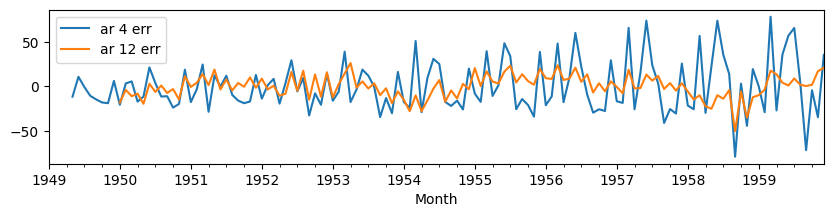

In [19]:
train_df[["ar 4 err", "ar 12 err"]].plot(figsize=(10, 2))

Moving Average는 AR 모델의 오차항들을 feature로 사용해서 예측을 하는 모델입니다. 이 때, 현재 시점으로부터 몇번째 전의 오차항까지 볼 것인지를 결정하는 파라미터가 q입니다. 

$$Y_{t}=\alpha+\epsilon_{t}+\phi_{1}\epsilon_{t-1}+\phi_{2}\epsilon_{t-2}+...+\phi_{q}\epsilon_{t-q}$$

$$\epsilon_{t}=Y_{t}-\hat{Y}_{t}$$

Moving Average 모델은 Auto Regressive 모델을 필요로 하기에, 단독으로 사용되지 않고, ARMA나 ARIMA 모델에서 AR 모델과 결합된 형태로 사용됩니다.

### ARMA

ARMA 모델은 AR 모델과 MA 모델을 단순 결합시킨 모델입니다. 이는 과거 시점의 데이터와 auto regressive 모델의 오차항을 독립 변수로 사용하는 회귀 모델입니다. 수식으로 표현하면 아래와 같습니다.

$$Y_{t}=\alpha+\beta_{1}Y_{t-1}+\beta_{t-2}Y_{t-2}+...+\beta_{p}Y_{t-p}+\epsilon_{t} +\phi_{1}\epsilon_{t-1}+\phi_{2}\epsilon_{t-2}+...+\phi_{q}\epsilon_{t-q}$$ 

이는 statsmodels에서 별도로 클래스로 제공하는 것은 없고, ARIMA 모델 생성시에 전달하는 차분 파라미터 d를 0으로 설정하면 학습시킬 수 있습니다.

### ARIMA

드디어 오늘의 주인공 ARIMA입니다. ARIMA는 차분을 적용하여 정상성을 확보한 데이터에 ARMA 모델을 학습시킨 모델입니다.

- AR: auto regressive (p)
- I: integrated (d)
- MA: Moving Average (q)

ARIMA 모델을 학습시키기 위해서는 p, q, d 세 파라미터가 필요합니다. 

- p: auto regressive 모델이 몇 lag 까지를 모델에 포함시킬 것인가
- d: 차분을 몇번 적용할 것인가
- q: moving average 모델이 몇 lag 까지를 모델에 포함시킬 것인가

여기서는 간단하게 임의의 파라미터를 지정해서 ARIMA를 학습시켜보고 결과를 시각화해보겠습니다.

In [20]:
from statsmodels.tsa.arima.model import ARIMA

arima_4_model = ARIMA(train_df["Passengers"], order=(4, 1, 2)).fit()
arima_12_model = ARIMA(train_df["Passengers"], order=(12, 1, 2)).fit()

/Users/user/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/user/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/user/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/user/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: 

In [21]:
arima_4_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  132
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -612.172
Date:                Fri, 12 Jan 2024   AIC                           1238.345
Time:                        11:12:18   BIC                           1258.471
Sample:                    01-01-1949   HQIC                          1246.523
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1512      0.112      1.353      0.176      -0.068       0.370
ar.L2          0.3946      0.094      4.186      0.000       0.210       0.579
ar.L3         -0.2603      0.101     -2.587      0.010      -0.458      -0.063
ar.L4         -0.2308      0.117     -1.976      0.048      -0.460      -0.002
ma.L1          0.1307      0.097      1.352      0.176      -0.059       0.320
ma.L2         -0.7461      0.112     -6.683      0.000      -0.965      -0.527
sigma2       661.5314     88.757      7.453      0.000     487.570     835.493
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                 2.34
Prob(Q):                              0.67   Prob(JB):                         0.31
Heteroskedasticity (H):               6.01   Skew:                             0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
arima_12_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  132
Model:                ARIMA(12, 1, 2)   Log Likelihood                -498.809
Date:                Fri, 12 Jan 2024   AIC                           1027.617
Time:                        11:12:29   BIC                           1070.745
Sample:                    01-01-1949   HQIC                          1045.142
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1106      0.096      1.149      0.250      -0.078       0.299
ar.L2         -0.1199      0.098     -1.220      0.222      -0.313       0.073
ar.L3          0.0323      0.066      0.488      0.626      -0.097       0.162
ar.L4         -0.1040      0.066     -1.573      0.116      -0.233       0.026
ar.L5          0.0827      0.067      1.243      0.214      -0.048       0.213
ar.L6         -0.1338      0.070     -1.920      0.055      -0.270       0.003
ar.L7          0.0698      0.075      0.936      0.349      -0.076       0.216
ar.L8         -0.1394      0.075     -1.855      0.064      -0.287       0.008
ar.L9          0.0939      0.070      1.350      0.177      -0.042       0.230
ar.L10        -0.1433      0.079     -1.821      0.069      -0.298       0.011
ar.L11         0.1014      0.083      1.217      0.224      -0.062       0.265
ar.L12         0.8089      0.089      9.128      0.000       0.635       0.983
ma.L1         -0.2512      0.137     -1.831      0.067      -0.520       0.018
ma.L2          0.1173      0.166      0.705      0.481      -0.209       0.443
sigma2       102.8938     16.452      6.254      0.000      70.649     135.138
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                 6.26
Prob(Q):                              0.67   Prob(JB):                         0.04
Heteroskedasticity (H):               1.92   Skew:                            -0.04
Prob(H) (two-sided):                  0.03   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

AR 모델과 ARIMA 모델의 성능을 측정해보겠습니다.

In [23]:
train_df["ARIMA 4"] = arima_4_model.predict()
train_df["ARIMA 12"] = arima_12_model.predict()

In [24]:
test_df["ARIMA 4"] = arima_4_model.forecast(steps=len(test_df))
test_df["ARIMA 12"] = arima_12_model.forecast(steps=len(test_df))

<Axes: xlabel='Month'>

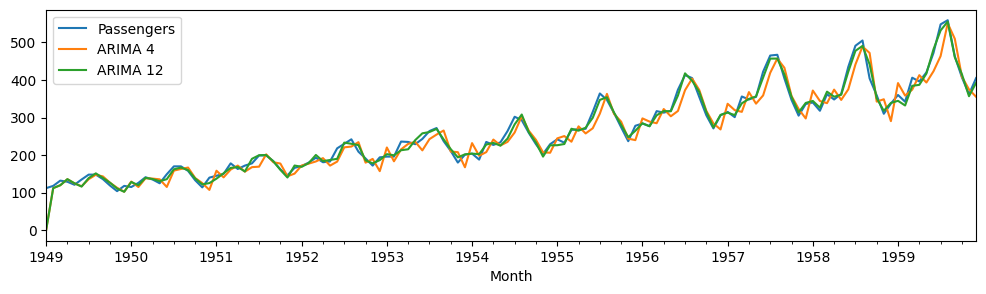

In [27]:
train_df[["Passengers", "ARIMA 4", "ARIMA 12"]].plot(figsize=(12, 3))

<Axes: xlabel='Month'>

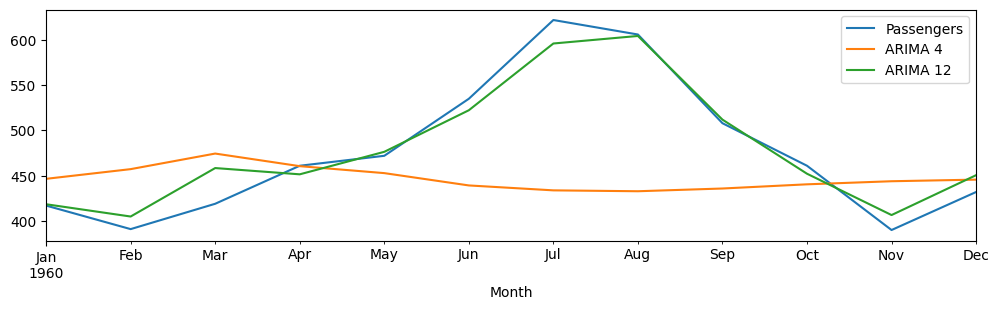

In [28]:
test_df[["Passengers", "ARIMA 4", "ARIMA 12"]].plot(figsize=(12, 3))

In [29]:
calculate_rmse(test_df, "Passengers", "ar 4")
calculate_rmse(test_df, "Passengers", "ar 12")
calculate_rmse(test_df, "Passengers", "ARIMA 4")
calculate_rmse(test_df, "Passengers", "ARIMA 12")

ar 4: 105.76024083588153
ar 12: 17.48752763093436
ARIMA 4: 87.55298319073208
ARIMA 12: 16.8564976417275


## 정리

이번 챕터에서는 기본적인 시계열 예측 모델인 ARIMA에 대해서 배워보았습니다. 그리고 ARIMA 모델을 학습시키기 위해서 필요한 파라미터 p, d, q에 대해서 알아보았고, 임의의 파라미터를 지정해서 모델을 학습시키고 결과를 확인해보았습니다. p, d, q 파라미터를 결정하기 위해서는 ACF, PACF 플랏을 보고, 복잡한 규칙을 적용해서 결정해야 합니다만, 생략하겠습니다.

ARIMA를 발전시킨 ARIMA 계열의 알고리즘들도 많이 존재합니다.
- SARIMA: 계절성을 반영한 ARIMA
- SARIMAX: 계절성과 외생 변수를 함께 고려한 ARIMA
- VAR: 여러 시계열 데이터를 한번에 고려한 ARIMA
- VARX: 여러 시계열 데이터와 외생변수를 고려한 ARIMA

그러나 이론들이 지나치게 복잡하고, 파라미터의 영향을 많이 받으며, 파라미터의 설정이 까다로워서 활용도가 높지 않습니다. (그리고 무엇보다 잘 안맞습니다 ㅎㅎ) 때문에 ARIMA 계열 알고리즘들을 더 깊게파기 보다는, 메타에서 새롭게 공개한 prophet 라이브러리를 익혀보고자 합니다.